In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import minimize

# Absorption of moisure by filter paper

In previous experiments, I had tried drying 10 g samples in empty aluminum weighing boats. This was problematic, since the samples seemed to develop a "skin" which prevented evaporation of moisture, and even after 60 hours in the oven at 212 °F the weight continued to drop slowly.

To prevent this, I added a coil of filter paper to each weighing boat. This wicked up the sample, increasing the surface area and preventing the formation of a skin. Using this technique, I was able to get stable dried weights with less than 24 hours of drying.

However, one of the first things I noticed when looking at data for this experiment is a difference between the two empty weights, `weight_empty_1` and `weight_empty_2`.

Text(0, 0.5, 'Change in empty weight (g)')

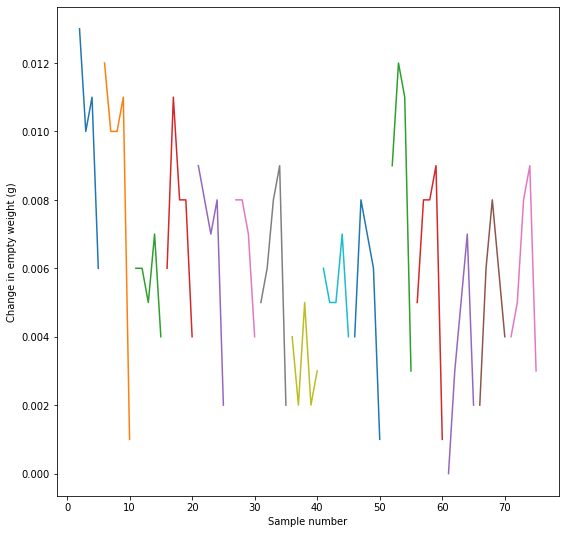

In [2]:
# Read experiment data
trials = pd.read_excel('results.xlsx', sheet_name='trials', index_col='id')

# Sort by index
trials.sort_index(inplace=True)

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Get range for each group
indexes = [1, 5, 10, 15, 20, 25, 26, 30, 35, 40, 45, 50, 51, 55, 60, 65, 70, 75]
ranges = zip(indexes[:-1], indexes[1:])

for r in ranges:
    # Plot the data
    df = trials[r[0]:r[1]]
    ax.plot(df.index, df.weight_empty_2 - df.weight_empty_1)

# Set axis labels
ax.set_xlabel('Sample number')
ax.set_ylabel('Change in empty weight (g)')

At the start of each day of the experiment, I first dried and weighed 25 sample boats with filter paper. This took about 10 minutes. Then I put the dried boats back in the oven while I prepared the samples. Before each group of samples (4 unfltered samples or 5 dilutions for each filtered coffee), I would remove the boats needed for that group, perform the measurement, then put them back into the oven. This whole process took about 20 minutes. So the total amount of time spent out of the oven after the initial drying would be less than 30 minutes for any sample.

It's not clear what could have caused so much gain in weight between the two measurements of the empty weighing boat. A similar change is observed over all three days of the experiment, with a little more change on the first day, when the drying was performed at 350 °F instead of 212 °F. Later samples on the first day would have spent more time at 212 °F before the second weighing, which could be why they look more like samples on the second and third days.

Interestingly, the "control" samples showed little change in weight on all three days. In the initial weighing they would have been weight last of the 25 weighing boats, and in the subsequent weighing they would have been weighed after all the samples had been prepared and weighed.

I don't think these initial changes in weight could have been caused by scale issues. The scale was checked often using 2 g and 10 g calibration weights, chosen to be close to the typical measured weights, and was never found to be in error by more than 0.001 g.

This issue could affect our oven drying results. We calculate oven dried TDS as follows:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Full weight} - \text{Empty weight}}
$$

Since the full sample boat is weighed moments after the second empty measurement, no change in moisture content should occur in this time. So we can rewrite this as:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Solution weight}}
$$

Finally, we add a term for change in moisture content.

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight} + \text{Moisture change}}{\text{Solution weight}}
$$

Since solution weight is similar between samples, we should see this mainly as a random offset in TDS:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Solution weight}} + \text{Random offset}
$$

In particular, if we look at the slope of TDS vs. refractive index over a series of dilutions, these changes should average out.

# Weight gain after turning the oven off

Following the experiment, I re-weighed the samples at 22 and 44 hours after the oven was turned off. These weights are given in `weight_dry_4` and `weight_dry_5`. If we look at the change in weight at each of these times, we get the following plot.

Text(0, 0.5, 'Change in weight (g)')

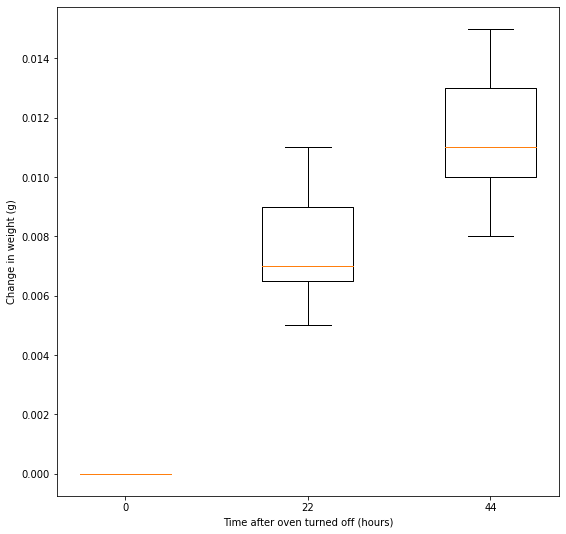

In [3]:
# Get weights after oven was turned off
xs = [0, 22, 44]
ys = [[0], 
      trials.weight_dry_4 - trials.weight_dry_3, 
      trials.weight_dry_5 - trials.weight_dry_3]

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the weights
ax.boxplot([[0], trials.weight_dry_4 - trials.weight_dry_3, trials.weight_dry_5 - trials.weight_dry_3],
          positions=[0, 22, 44], widths=11)

# Set axis labels
ax.set_xlabel('Time after oven turned off (hours)')
ax.set_ylabel('Change in weight (g)')

There is surprisingly little change in weight here over the course of 30 minutes--probably not enough to justify the changes we saw between the two empty weight measurements.

# Filter paper drying test

For this test, I prepared 5 weighing boats with Chemex filter paper coils as described in the blog post. The oven was preheated to 212 °F, then the following procedure was repeated for a total of 2 hours:

* Check 0.001 g scale using 10 g and 2 g weights
* Weigh aluminum boat alone, then aluminum boat and filter for each sample
* Put samples in oven for 15 minutes

The weighing procedure took about 2 minutes out of the 15 minute cycle.

Let's look at the data.

In [4]:
trials_2 = pd.read_excel('empty-weights.xlsx', sheet_name='trials', index_col='id')
trials_2.head()

,time,boat_1,total_1,boat_2,total_2,boat_3,total_3,boat_4,total_4,boat_5,total_5,notes
id,,,,,,,,,,,,
1,15:20:00,0.733,0.972,0.739,0.971,0.733,0.951,0.728,0.943,0.742,0.988,In preheated oven at 212 F after this
2,15:35:00,0.733,0.963,0.741,0.961,0.733,0.943,0.729,0.936,0.742,0.981,NaN
3,15:50:00,0.732,0.960,0.739,0.960,0.733,0.941,0.727,0.937,0.741,0.978,NaN
4,16:05:00,0.733,0.960,0.738,0.961,0.733,0.943,0.726,0.934,0.741,0.978,NaN
5,16:20:00,0.732,0.958,0.736,0.960,0.734,0.943,0.728,0.936,0.743,0.980,NaN


The weight of the empty boats doesn't seem to have changed throughout the experiment, so we can calculate the average weight of each boat.

In [5]:
boat_weights = []
for i in range(5):
    boat_weights.append(trials_2[f'boat_{i+1}'].mean())
boat_weights

[0.7321249999999999, 0.7380625, 0.73325, 0.7274375, 0.741]

We will also need time measured in hours from the start of the experiment.

In [6]:
dt0 = datetime.datetime.combine(datetime.date.today(), trials_2.iloc[0].time)
dt = [datetime.datetime.combine(datetime.date.today(), t) for t in trials_2.time]
trials_2['hours'] = [(t - dt0).seconds / 3600 for t in dt]
trials_2.head()

,time,boat_1,total_1,boat_2,total_2,boat_3,total_3,boat_4,total_4,boat_5,total_5,notes,hours
id,,,,,,,,,,,,,
1,15:20:00,0.733,0.972,0.739,0.971,0.733,0.951,0.728,0.943,0.742,0.988,In preheated oven at 212 F after this,0.00
2,15:35:00,0.733,0.963,0.741,0.961,0.733,0.943,0.729,0.936,0.742,0.981,NaN,0.25
3,15:50:00,0.732,0.960,0.739,0.960,0.733,0.941,0.727,0.937,0.741,0.978,NaN,0.50
4,16:05:00,0.733,0.960,0.738,0.961,0.733,0.943,0.726,0.934,0.741,0.978,NaN,0.75
5,16:20:00,0.732,0.958,0.736,0.960,0.734,0.943,0.728,0.936,0.743,0.980,NaN,1.00


Now we can plot the weight of the filter paper vs. time.

Text(0, 0.5, 'Weight of filter paper (g)')

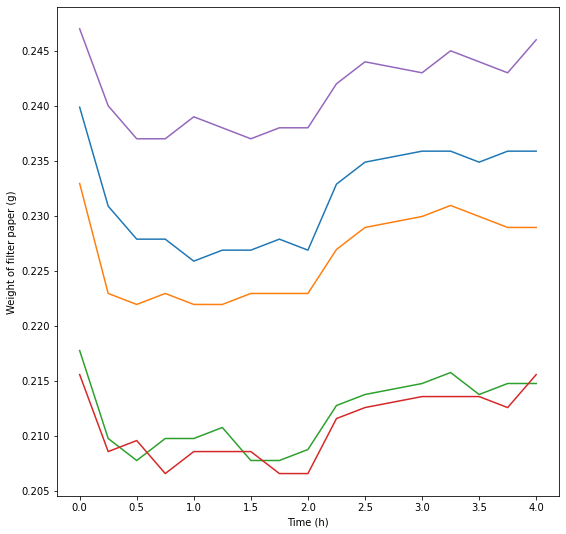

In [7]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

for i in range(5):
    # Plot the data
    ax.plot(trials_2.hours, trials_2[f'total_{i+1}'] - boat_weights[i])

# Set axis labels
ax.set_xlabel('Time (h)')
ax.set_ylabel('Weight of filter paper (g)')

After cooling on the counter begins, we see about 4 g increase in weight in just 15 minutes.

Let's try to fit each of these with a continuous curve that combines two exponentials. We can use a single time constant for each phase, since intuitively it seems that these should be determined by the difference between the start and end conditions.

Suppose we have an exponential curve defined by:

$$
y = y_0 + a \exp{\left( -\frac{x}{b} \right)}
$$

Let's say we know two points, $(x_1, y_1)$ and $(x_2, y_2)$ on the curve, and the time constant, $b$. Then we have:

$$
y_1 - y_0 = a \exp{\left( -\frac{x_1}{b} \right)},\quad y_2 - y_0 = a \exp{\left( -\frac{x_2}{b} \right)}
$$

We want to solve for $y_0$ and $a$. Dividing these two expressions:

$$
\frac{y_1 - y_0}{y_2 - y_0} = \frac{a \exp{\left( -x_1 / b \right)}}{a \exp{\left( -x_2 / b \right)}} = \exp{\left( \frac{x_2 - x_1}{b} \right)}
$$

Let $R = \exp{((x_2 - x_1) / b)}$. Then:

$$
\frac{y_1 - y_0}{y_2 - y_0} = R
$$

Solving for $y_0$:

$$
\begin{gather}
y_1 - y_0 = (y_2 - y_0) R \\
y_0 (R - 1) = y_2 R - y_1 \\
y_0 (R - 1) = y_2 (R - 1) + y_2 - y_1 \\
y_0 = y_2 + \frac{y_2 - y_1}{R - 1} \\
\end{gather}
$$

Substituting into the original equation:

$$
\begin{gather}
y_2 - y_0 = a \exp{\left( -\frac{x_2}{b} \right)} \\
y_2 - y_2 - \frac{y_2 - y_1}{R - 1} = a \exp{\left( -\frac{x_2}{b} \right)} \\
-\frac{y_2 - y_1}{R - 1} = a \exp{\left( -\frac{x_2}{b} \right)} \\
\end{gather}
$$

And solving for $a$:

$$
\begin{gather}
a = -\frac{y_2 - y_1}{R - 1} \exp{\left( \frac{x_2}{b} \right)} \\
\end{gather}
$$

Let's try plotting the fit function.

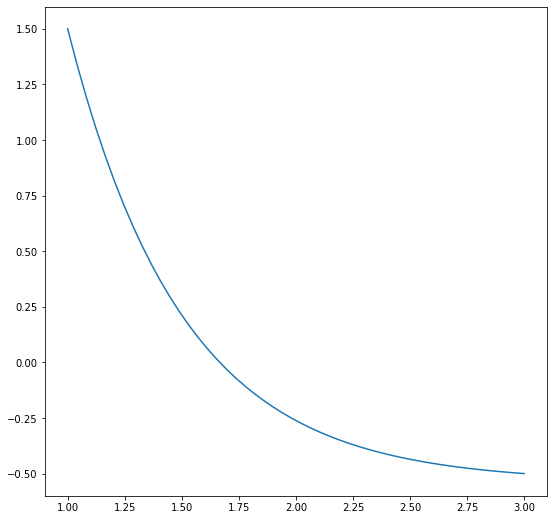

In [8]:
def fit_func(x, x1, x2, y1, y2, b):
    R = np.exp((x2 - x1) / b)
    y0 = y2 + (y2 - y1) / (R - 1)
    a = -(y2 - y1) / (R - 1) * np.exp(x2 / b)
    return y0 + a * np.exp(-x / b)

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

# Plot the function
xs = np.linspace(1, 3, 50)
ys = fit_func(xs, 1, 3, 1.5, -0.5, .5)
ax.plot(xs, ys)

Now let's try optimizing this curve to fit the data.

In [9]:
def single_error(xs, ys, b12, b23, y1, y2, y3):
    x1, x2, x3 = 0, 2, 4
    
    err = 0.
    for (x, y) in zip(xs, ys):
        if x < 2:
            err += (y - fit_func(x, x1, x2, y1, y2, b12))**2
        else:
            err += (y - fit_func(x, x2, x3, y2, y3, b23))**2
    
    return err

def error_func(x, args):
    N = int(args[0])
    xs = args[1]
    
    b12 = x[0]
    b23 = x[1]
    y1 = x[2:2+N]
    y2 = x[2+N:2+2*N]
    y3 = x[2+2*N:2+3*N]
    
    err = 0.
    for i in range(N):
        ys = args[2 + i]
        err += single_error(xs, ys, b12, b23, y1[i], y2[i], y3[i])
    
    return err

N = 5
x0 = np.concatenate(([1], [1], [1] * N, [0] * N, [1] * N))
args = [N, trials_2.hours.values]

for i in range(N):
    args.append(trials_2[f'total_{i+1}'].values - boat_weights[i])

fit = minimize(error_func, x0, args).x
fit

array([0.14111818, 0.2371789 , 0.24012503, 0.23272522, 0.21762583,
       0.21552014, 0.24707992, 0.22727076, 0.22231545, 0.2087897 ,
       0.20773413, 0.23775535, 0.23574814, 0.22975318, 0.21473848,
       0.21370626, 0.24431235])

And finally we can plot the fit.

Text(0, 0.5, 'Weight of filter paper (g)')

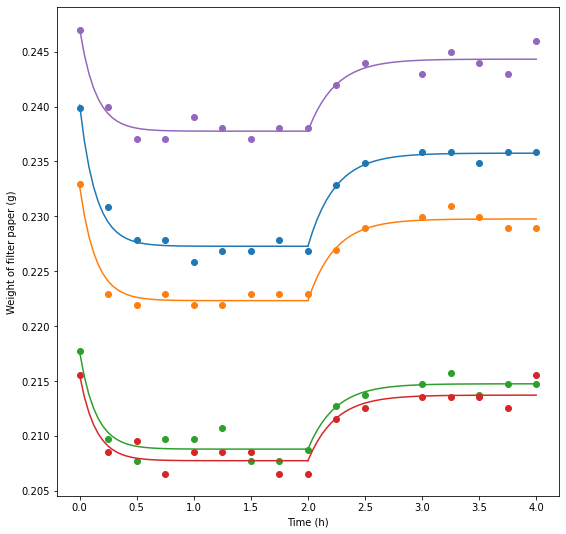

In [10]:
# Get fit parameters
b12 = fit[0]
b23 = fit[1]
y1 = fit[2:2+N]
y2 = fit[2+N:2+2*N]
y3 = fit[2+2*N:2+3*N]

# Get default colours
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Create the figure
fig, ax = plt.subplots(figsize=(9,9))
fig.patch.set_facecolor('white')

for i in range(5):
    # Plot the fit
    xs = np.linspace(0, 2)
    ys = fit_func(xs, 0, 2, y1[i], y2[i], b12)
    ax.plot(xs, ys, c=colors[i])

    xs = np.linspace(2, 4)
    ys = fit_func(xs, 2, 4, y2[i], y3[i], b23)
    ax.plot(xs, ys, c=colors[i])
    
    # Plot the data
    ax.scatter(trials_2.hours, trials_2[f'total_{i+1}'] - boat_weights[i], c=colors[i])
    
# Set axis labels
ax.set_xlabel('Time (h)')
ax.set_ylabel('Weight of filter paper (g)')

These fits are excellent, which suggests that the time constant depends only on temperature change. We get a time constant of about 8 minutes for loss of moisture in an oven at 100 °C, and about 14 minutes for samples cooling at room temperature.

# Error analysis

Let's look at the effect this change would have on our oven drying results. We calculate oven dried TDS as follows:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Full weight} - \text{Empty weight}}
$$

Since the full sample boat is weighed moments after the second empty measurement, no change in moisture content should occur in this time. So we can rewrite this as:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Solution weight}}
$$

Finally, we add a term for change in moisture content.

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight} + \text{Moisture change}}{\text{Solution weight}}
$$

Since solution weight is similar between samples, we should see this mainly as a systematic offset in TDS:

$$
\text{TDS} = \frac{\text{Dry weight} - \text{Empty weight}}{\text{Solution weight}} + \text{Offset}
$$

Provided weighing boats are out of the oven for less than about 15 minutes, this offset should be larger for weighing boats which spend more time out of the oven. Since we prepared the most diluted samples last, these should be the most affected. If we plot oven dried TDS vs. refractive index, we expect oven dried TDS to be zero at a refractive index of 1.3330, so we can check the data by confirming that this is the case.

For filtered samples, if we fit a quadratic curve to the data, we get a TDS of -0.04% at a refractive index of 1.3330. This is on the same order as the propagated uncertainty in oven dried TDS based on uncertainty in weight measurements, so it seems unlikely that our data is significantly affected by this issue.

This could be because a similar procedure was used for the preparation of the samples and for subsequent weighing of the samples while drying, so that samples would have spent a similar amount of time out of the oven in both cases.